In [109]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

## Importation et traitement des données récupérer avec pandas

In [8]:
df = pd.read_csv("housePriceCapeTown.csv",sep="|")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1273 entries, 0 to 1272
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        1247 non-null   float64
 1   bathroom       1272 non-null   float64
 2   garage         669 non-null    float64
 3   parking        388 non-null    float64
 4   erf-size       852 non-null    object 
 5   building-size  919 non-null    object 
 6   price          1273 non-null   object 
dtypes: float64(4), object(3)
memory usage: 69.7+ KB


In [10]:
print(df[df["bathroom"].isna()].index.tolist())

df.loc[728]

[728]


bedroom                 NaN
bathroom                NaN
garage                  NaN
parking                 NaN
erf-size             600 m²
building-size           NaN
price            R2,995,000
Name: 728, dtype: object

In [11]:
# remarquon que la ligne 728 ne contient qu'un seul feature. elle est pratiquement inutilisable 
#donc vaut mieux l'enlever

df.drop(728,inplace=True)

In [12]:
#cleaning NaN in the features garage and parking
df["garage"] = df["garage"].fillna(0)
df["parking"] = df["parking"].fillna(0)
df["garage"].value_counts()

0.0     603
2.0     339
1.0     194
3.0      73
4.0      42
5.0      10
6.0       6
10.0      3
8.0       2
Name: garage, dtype: int64

In [13]:
#cleaning the features erf-size
df["erf-size"] = df["erf-size"].fillna("0m2")
df["erf-size"] = df["erf-size"].str[:-2].str.replace(",","").astype(int)

df

,bedroom,bathroom,garage,parking,erf-size,building-size,price
0,6.0,6.0,8.0,0.0,5965,"1,700 m²","R100,000,000"
1,5.0,6.0,10.0,0.0,1241,"1,800 m²",POA
2,4.0,6.0,3.0,0.0,818,900 m²,"R85,000,000"
3,4.0,4.5,2.0,2.0,721,780 m²,"R85,000,000"
4,5.0,4.5,3.0,0.0,579,625 m²,"R82,800,000"
...,...,...,...,...,...,...,...
1268,3.0,1.0,0.0,0.0,248,NaN,"R420,000"
1269,3.0,1.0,0.0,0.0,148,NaN,"R400,000"
1270,3.0,1.0,0.0,0.0,144,NaN,"R395,000"
1271,1.0,1.0,0.0,0.0,34,34 m²,"R390,000"


In [14]:
#cleaning price
##effacer les maisons avec un prix POA
index = df[df["price"]=="POA"].index
df.drop(index,inplace=True)
df["price"] = df["price"].str[1:].str.replace(",","").astype(int)

df

,bedroom,bathroom,garage,parking,erf-size,building-size,price
0,6.0,6.0,8.0,0.0,5965,"1,700 m²",100000000
2,4.0,6.0,3.0,0.0,818,900 m²,85000000
3,4.0,4.5,2.0,2.0,721,780 m²,85000000
4,5.0,4.5,3.0,0.0,579,625 m²,82800000
5,5.0,5.5,3.0,0.0,705,NaN,75000000
...,...,...,...,...,...,...,...
1268,3.0,1.0,0.0,0.0,248,NaN,420000
1269,3.0,1.0,0.0,0.0,148,NaN,400000
1270,3.0,1.0,0.0,0.0,144,NaN,395000
1271,1.0,1.0,0.0,0.0,34,34 m²,390000


In [15]:
#cleaning the feature building-size 
df["building-size"] = df["building-size"].fillna("0m2")
df["building-size"] = df["building-size"].str[:-2].str.replace(",","").astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 0 to 1272
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        1241 non-null   float64
 1   bathroom       1266 non-null   float64
 2   garage         1266 non-null   float64
 3   parking        1266 non-null   float64
 4   erf-size       1266 non-null   int64  
 5   building-size  1266 non-null   int64  
 6   price          1266 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 79.1 KB


In [16]:
### cleaning building-size feature which has an high correlation with the bathroom
index_nan = df[df["building-size"]==0].index

for i in range(len(index_nan)):
    donnee = df[df["bathroom"] == df["bathroom"][index_nan[i]]]
    data = (np.max(donnee["building-size"]) - np.min(donnee["building-size"]))/2
    df["building-size"][index_nan[i]] = data
df["bedroom"].value_counts()

/tmp/ipykernel_6925/1496670469.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["building-size"][index_nan[i]] = data


3.0     356
2.0     318
4.0     231
1.0     150
5.0     122
6.0      41
7.0      11
8.0       8
10.0      2
9.0       1
11.0      1
Name: bedroom, dtype: int64

In [26]:
### cleaning bedroom feature 
index_nan = df[df["bedroom"].isna()].index.tolist()

for i in range(len(index_nan)):
    donnee = df[df["bathroom"] == df["bathroom"][index_nan[i]]]
    data = (np.max(donnee["bedroom"]) - np.min(donnee["bedroom"]))/2
    df["bedroom"][index_nan[i]] = data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1266 entries, 0 to 1272
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedroom        1266 non-null   float64
 1   bathroom       1266 non-null   float64
 2   garage         1266 non-null   float64
 3   parking        1266 non-null   float64
 4   erf-size       1266 non-null   int64  
 5   building-size  1266 non-null   float64
 6   price          1266 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 111.4 KB


/tmp/ipykernel_6925/4057715840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bedroom"][index_nan[i]] = data


In [27]:
corr = df.corr()
df.describe()

,bedroom,bathroom,garage,parking,erf-size,building-size,price
count,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1266.000000,1.266000e+03
mean,3.052923,2.430095,1.078989,0.544234,713.736177,244.206951,7.626214e+06
std,1.434045,1.492157,1.297642,1.072113,3967.388422,208.503560,1.079610e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.700000e+05
25%,2.000000,1.000000,0.000000,0.000000,0.000000,88.250000,1.875000e+06
50%,3.000000,2.000000,1.000000,0.000000,240.000000,161.500000,3.750000e+06
75%,4.000000,3.000000,2.000000,1.000000,731.500000,356.000000,8.500000e+06
max,11.000000,11.000000,10.000000,13.000000,132497.000000,1700.000000,1.000000e+08


In [28]:
corr["price"].sort_values(ascending=False)

price            1.000000
building-size    0.598662
bathroom         0.584839
bedroom          0.409241
garage           0.368251
parking          0.150752
erf-size         0.059889
Name: price, dtype: float64

# Exploration et visualisation de données

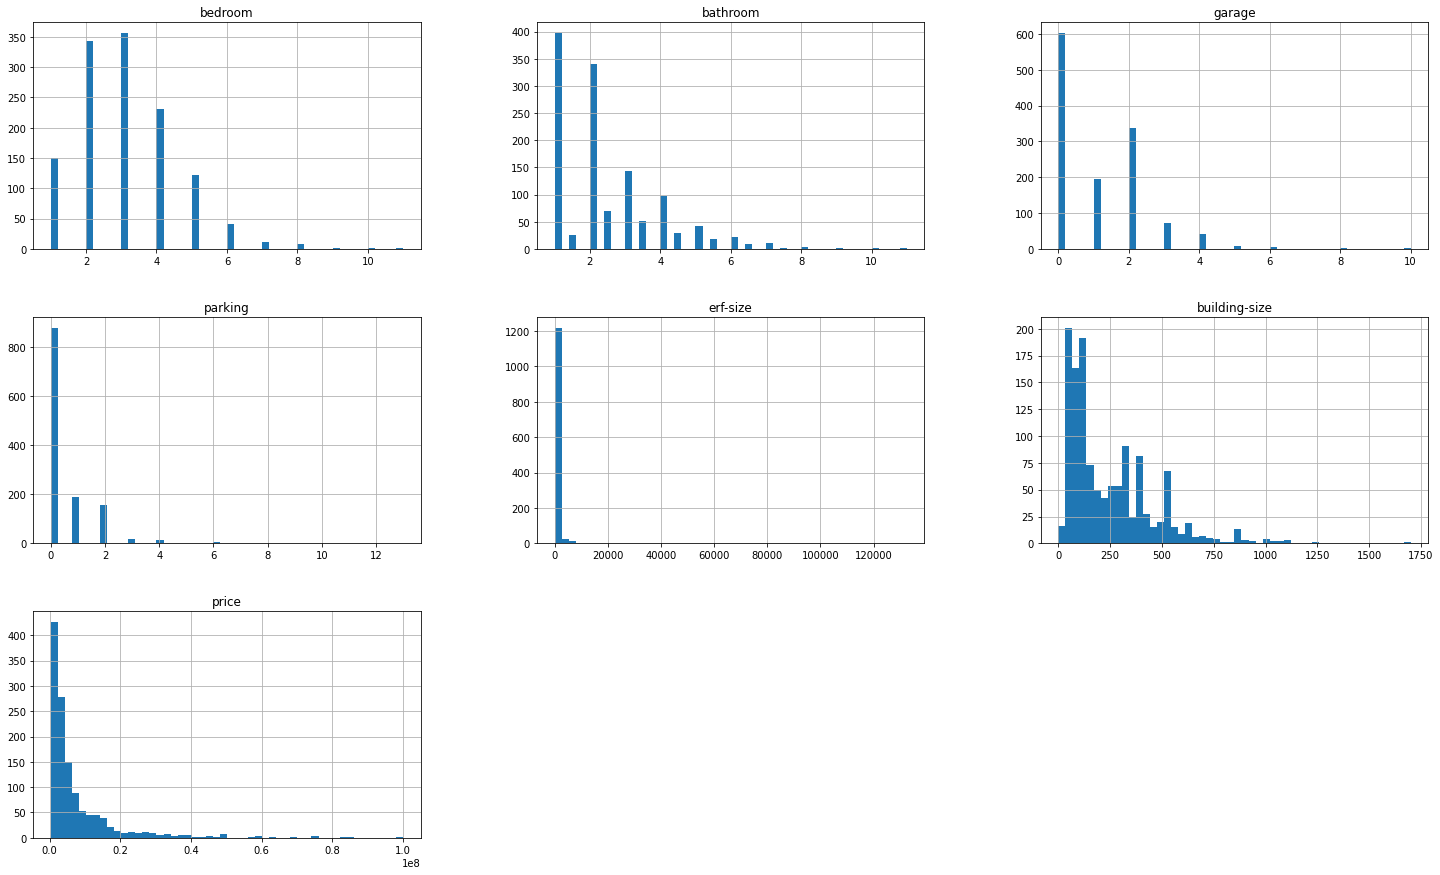

In [122]:
df.hist(bins = 50 , figsize = (25,15))
plt.show()

# Interprétation des graphes ci-dessus

Dans la figure bedroom, bathroom, garage, parking, price :

    On voit que beaucoup de maisons possèdent 3 bedroom et 1 bathroom,
    des maisons qui n'ont presque pas de garage et de parking.
    On remarque qu'il y a aussi des maisons à des prix abordable entre ]1050000, 4950000[
    
Dans la figure erf-size et building-size:

    Il y a beaucoup d'appartement qui n'ont pas de cours.
    Et il y a aussi des maisons avec des cours.
    

### Représentation en nuages de points de chaque features avec le prix

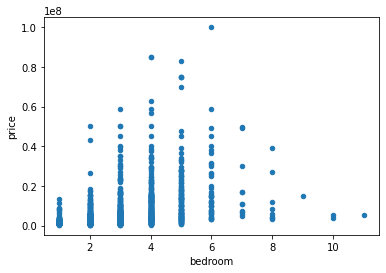

In [124]:
df.plot.scatter("bedroom", "price")
plt.show()

Le graphe ci-dessus montre que le feature "bedroom" a une légère relation avec le prix, ce qui n'influence pas le prix.

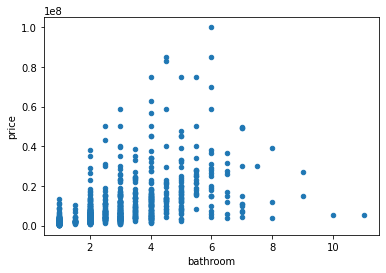

In [125]:
df.plot.scatter("bathroom", "price")
plt.show()

Le graphe ci-dessus montre que le feature "bathroom" a une relation moyenne avec le prix, ce qui peut affecter le prix de la maison.

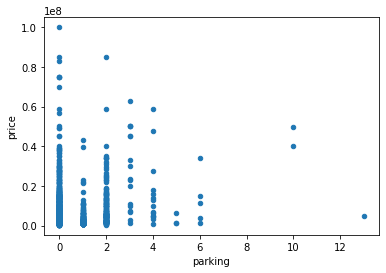

In [126]:
df.plot.scatter("parking", "price")
plt.show()

Le graphe ci-dessus montre que le feature "parking" a une faible relation avec le prix.

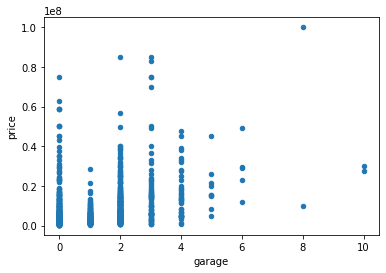

In [127]:
df.plot.scatter("garage", "price")
plt.show()

Le graphe ci-dessus montre que le feature "garage" a une faible relation avec le prix.

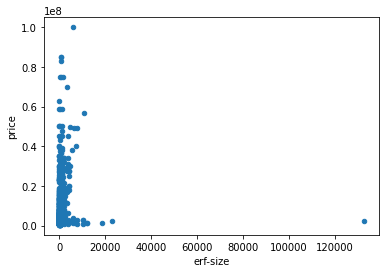

In [128]:
df.plot.scatter("erf-size", "price")
plt.show()

Le graphe ci-dessus montre que le feature "erf-size" a une très faible relation avec le prix de la maison

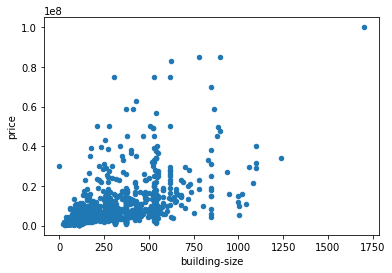

In [129]:
df.plot.scatter("building-size", "price")
plt.show()

Le graphe ci-dessus montre que le feature "building-size" a une relation moyenne avec le prix, ce qui peut affecter le prix de la maison.

### INTERPRETATION DE DONNEES

Les histogrammes ci-dessus montrent les valeurs de chaque attribut(features) pour l'ensemble de données colléctées

In [31]:
#standard scaler 
scaler = StandardScaler()
df1 = scaler.fit_transform(df[["bedroom","bathroom","garage","parking","erf-size","building-size"]])
df1

array([[ 2.05589204e+00,  2.39339166e+00,  5.33563714e+00,
        -5.07828119e-01,  1.32413025e+00,  6.98486082e+00],
       [ 6.60684684e-01,  2.39339166e+00,  1.48097119e+00,
        -5.07828119e-01,  2.62906010e-02,  3.14647963e+00],
       [ 6.60684684e-01,  1.38773821e+00,  7.10037995e-01,
         1.35838494e+00,  1.83160629e-03,  2.57072245e+00],
       ...,
       [-3.69189940e-02, -9.58786502e-01, -8.31828388e-01,
        -5.07828119e-01, -1.43661589e-01, -6.43921795e-01],
       [-1.43212635e+00, -9.58786502e-01, -8.31828388e-01,
        -5.07828119e-01, -1.71398593e-01, -1.00856801e+00],
       [-1.43212635e+00, -9.58786502e-01, -8.31828388e-01,
        -5.07828119e-01, -1.71398593e-01, -1.00856801e+00]])

### Choix du modèle efficace 

In [32]:

X_train ,X_test,y_train,y_test = train_test_split(df1,df["price"],test_size= 0.2,random_state=42)
performance = []

## Linear Regression

In [119]:
model = LinearRegression()
model.fit(X_train,np.log(y_train))

pred = model.predict(X_test)

print(f"MSE linear regression: {mean_squared_error(pred,np.log(y_test))}")
performance.append()

MSE linear regression: 0.4725164516517228
MSE linear regression: 0.47442352845476354


## Ridge Regression

Meilleur hyperparamètre pour un modele de Ridge regression: {'alpha': 18}


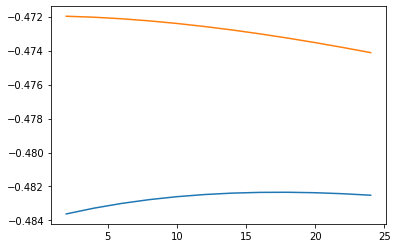

Pourcentage: 0.5845597881440848
MSE Ridge: 0.46608475068023447


In [121]:
hyperparametre={"alpha":[2,4,6,8,10,12,14,16,18,20,22,24]}
tuned_ridge = GridSearchCV(Ridge(),hyperparametre,scoring="neg_mean_squared_error",cv=5,return_train_score=True)

tuned_ridge.fit(X_train,np.log(y_train))



print(f"Meilleur hyperparamètre pour un modele de Ridge regression: {tuned_ridge.best_params_}")
model_ridge = tuned_ridge.best_estimator_

model_ridge.fit(X_train,np.log(y_train))
pred_ridge = model_ridge.predict(X_test)

test_scores = tuned_ridge.cv_results_['mean_test_score']
train_scores = tuned_ridge.cv_results_['mean_train_score'] 


plt.plot(hyperparametre["alpha"],test_scores ,label='test')
plt.plot(hyperparametre["alpha"],train_scores, label='train')

plt.show()


print(f"Pourcentage: {model_ridge.score(X_test,np.log(y_test))}")

print(f"MSE Ridge: {mean_squared_error(pred_ridge,np.log(y_test))}")


## Lasso

Meilleur hyperparamètre pour un modele Lasso Regression: {'alpha': 0.1}


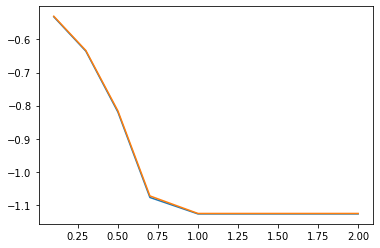

Pourcentage: 0.6019144353563869
MSE Ridge: 0.44661447267571963


In [114]:
hyperparametre={"alpha":[0.1,0.3,0.5,0.7,1,1.5,2]}
tuned_lasso = GridSearchCV(Lasso(),hyperparametre,scoring="neg_mean_squared_error",cv=5,return_train_score=True)

tuned_lasso.fit(X_train,np.log(y_train))



print(f"Meilleur hyperparamètre pour un modele Lasso Regression: {tuned_lasso.best_params_}")
model_lasso = tuned_lasso.best_estimator_

model_lasso.fit(X_train,np.log(y_train))
pred_lasso = model_lasso.predict(X_test)

test_scores = tuned_lasso.cv_results_['mean_test_score']
train_scores = tuned_lasso.cv_results_['mean_train_score'] 

tuned_lasso.cv_results_.keys()

plt.plot(hyperparametre["alpha"],test_scores ,label='test')
plt.plot(hyperparametre["alpha"],train_scores, label='train')

plt.show()


print(f"Pourcentage: {model_lasso.score(X_test,np.log(y_test))}")

print(f"MSE Ridge: {mean_squared_error(pred_lasso,np.log(y_test))}")


## SVR

Meilleur hyperparamètre pour un modele SVR: {'epsilon': 0.1}


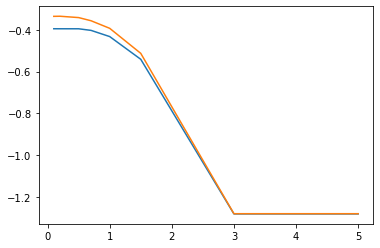

Pourcentage: 0.6777620103120454
MSE Ridge: 0.36152064436049336


In [116]:
params = {"epsilon":[0.1,0.2,0.5,0.7,1,1.5,3,5]}

tuned_svr = GridSearchCV(SVR(),params,scoring="neg_mean_squared_error",cv=5,return_train_score=True)

tuned_svr.fit(X_train,np.log(y_train))


print(f"Meilleur hyperparamètre pour un modele SVR: {tuned_svr.best_params_}")
model_svr = tuned_svr.best_estimator_

model_svr.fit(X_train,np.log(y_train))
pred_svr = model_svr.predict(X_test)

test_scores = tuned_svr.cv_results_['mean_test_score']
train_scores = tuned_svr.cv_results_['mean_train_score'] 


plt.plot(params["epsilon"],test_scores ,label='test')
plt.plot(params["epsilon"],train_scores, label='train')

plt.show()


print(f"Pourcentage: {model_svr.score(X_test,np.log(y_test))}")

print(f"MSE Ridge: {mean_squared_error(pred_svr,np.log(y_test))}")


## Random Forest

In [117]:
params = {"max_depth":[2,4,8,16],"n_estimators":[100,200,300,400]}

tuned_randforest = GridSearchCV(RandomForestRegressor(bootstrap=True,random_state=0),params,scoring="neg_mean_squared_error",cv=5,return_train_score=True)

tuned_randforest.fit(X_train,np.log(y_train))


print(f"Meilleur hyperparamètre pour un modele Random Forest: {tuned_randforest.best_params_}")
model_randforest = tuned_randforest.best_estimator_

model_randforest.fit(X_train,np.log(y_train))
pred_randforest = model_randforest.predict(X_test)


print(f"Pourcentage: {model_randforest.score(X_test,np.log(y_test))}")

print(f"MSE Ridge: {mean_squared_error(pred_randforest,np.log(y_test))}")


Meilleur hyperparamètre pour un modele Random Forest: {'max_depth': 8, 'n_estimators': 200}
Pourcentage: 0.7608610236178416
MSE Ridge: 0.2682913858701322
